In [72]:
import pandas as pd

vit_ensemble = pd.read_csv("vit_ensemble_metrics.csv")
conv_ensemble = pd.read_csv("conv_ensemble_metrics.csv")

In [73]:
vit_base_16 = pd.read_csv("vit_base_16_metrics.csv")
convnext = pd.read_csv("convnext_metrics.csv")

In [74]:
vit_ensemble.sort_values(by="test/BalancedAccuracy", ascending=False, inplace=True)
vit_ensemble.describe()

,test/Accuracy,test/BalancedAccuracy
count,11.000000,11.000000
mean,0.808250,0.788499
std,0.001695,0.001975
min,0.805419,0.784703
25%,0.807005,0.787939
50%,0.808590,0.788413
75%,0.809167,0.789432
max,0.810608,0.791644


In [75]:
conv_ensemble.sort_values(by="test/BalancedAccuracy", ascending=False, inplace=True)
conv_ensemble.describe()

,test/Accuracy,test/BalancedAccuracy
count,11.000000,11.000000
mean,0.816976,0.780758
std,0.002347,0.002136
min,0.812626,0.777598
25%,0.815221,0.779015
50%,0.817815,0.781542
75%,0.818536,0.782137
max,0.819833,0.783742


In [76]:
vit_base_16.sort_values(by="test/BalancedAccuracy", ascending=False, inplace=True)
vit_base_16.describe()

,test/loss,test/Accuracy,test/BalancedAccuracy
count,11.000000,11.000000,11.000000
mean,1.311125,0.761052,0.739248
std,0.003171,0.002085,0.002479
min,1.306514,0.757855,0.734706
25%,1.308323,0.759297,0.738049
50%,1.311312,0.761315,0.740159
75%,1.313605,0.762756,0.741158
max,1.315910,0.763621,0.741486


In [77]:
convnext.sort_values(by="test/BalancedAccuracy", ascending=False, inplace=True)
convnext.describe()

,test/loss,test/Accuracy,test/BalancedAccuracy
count,11.000000,11.000000,11.000000
mean,1.601513,0.746194,0.712884
std,0.002231,0.002665,0.002669
min,1.598643,0.741712,0.708192
25%,1.599725,0.744307,0.710697
50%,1.601353,0.746325,0.713318
75%,1.603033,0.747478,0.714577
max,1.605427,0.750937,0.717019


In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Accuracy of Models')

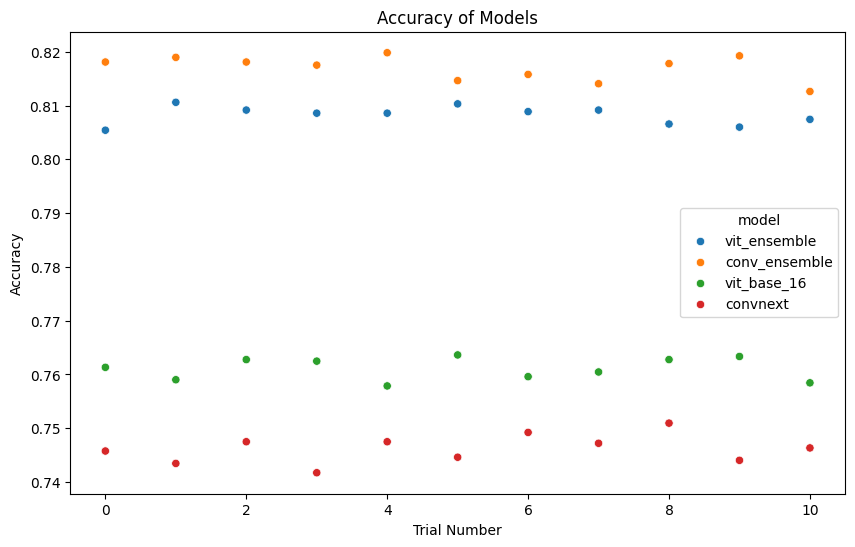

In [79]:
all_metrics = pd.concat([vit_ensemble, conv_ensemble, vit_base_16, convnext], axis=0)
all_metrics["model"] = (
    ["vit_ensemble"] * vit_ensemble.shape[0]
    + ["conv_ensemble"] * conv_ensemble.shape[0]
    + ["vit_base_16"] * vit_base_16.shape[0]
    + ["convnext"] * convnext.shape[0]
)

all_metrics
plt.figure(figsize=(10, 6))
sns.scatterplot(data=all_metrics, x=all_metrics.index, y="test/Accuracy", hue="model")

plt.xlabel("Trial Number")

plt.ylabel("Accuracy")
plt.title("Accuracy of Models")

Text(0.5, 1.0, 'Balanced Accuracy of Models')

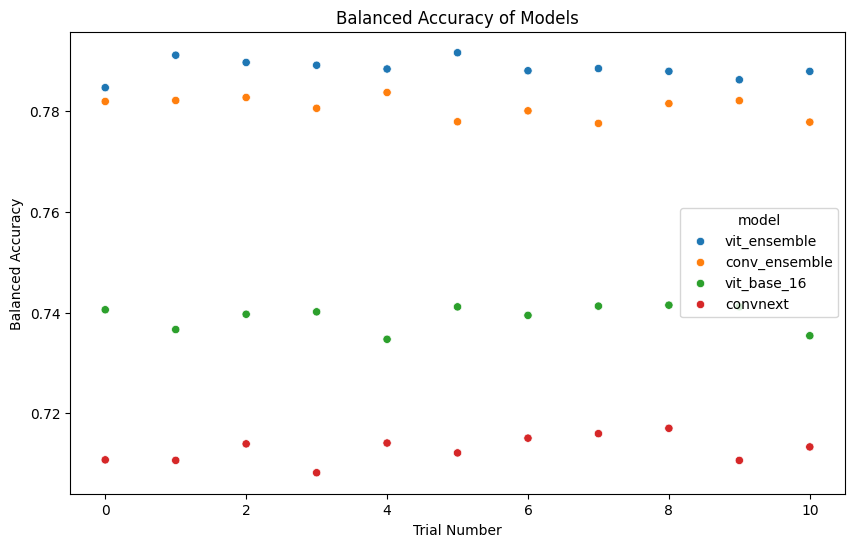

In [80]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=all_metrics, x=all_metrics.index, y="test/BalancedAccuracy", hue="model"
)

plt.xlabel("Trial Number")
plt.ylabel("Balanced Accuracy")
plt.title("Balanced Accuracy of Models")

Text(0.5, 1.0, 'ConvNext Balanced Accuracy QQ Plot')

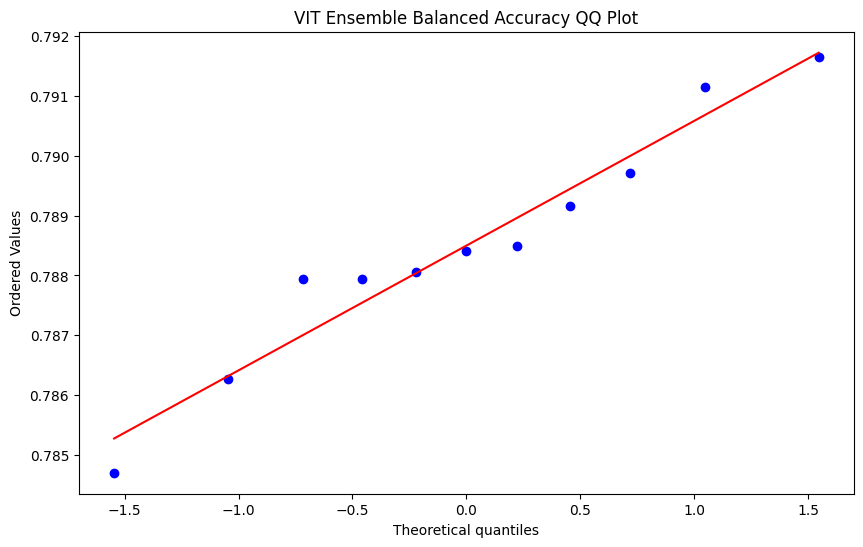

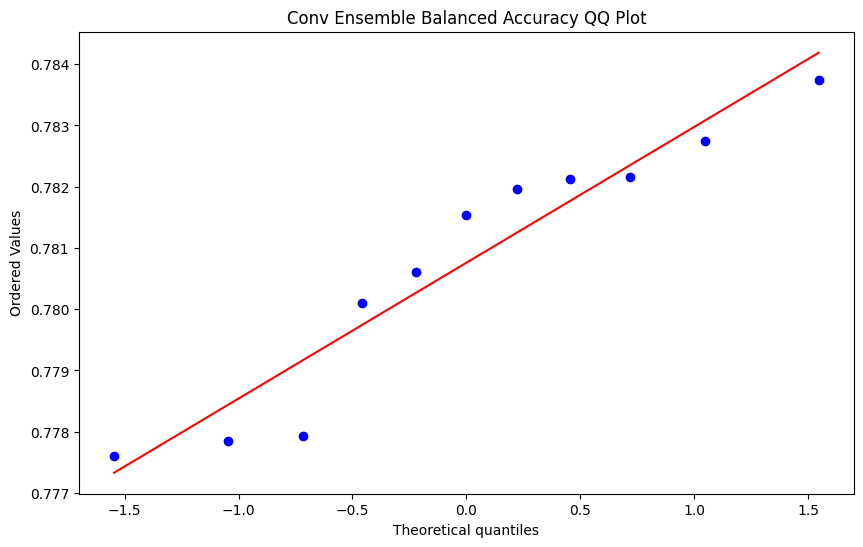

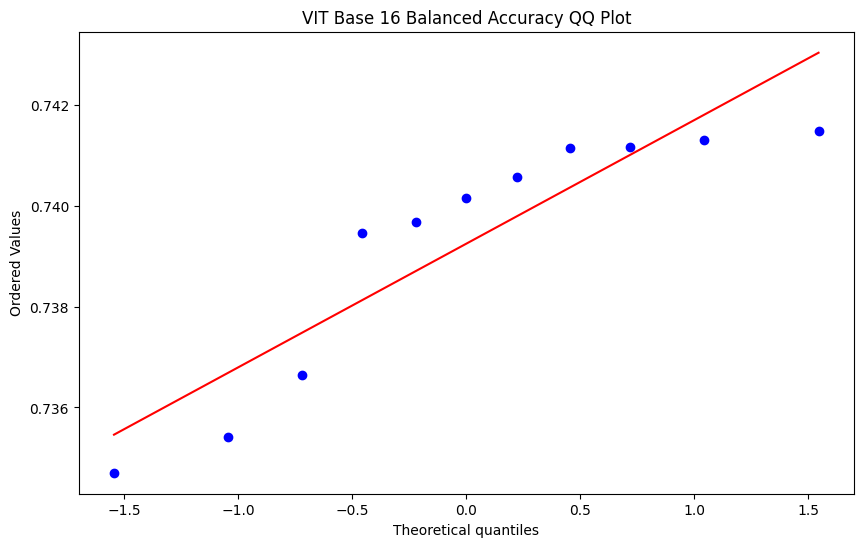

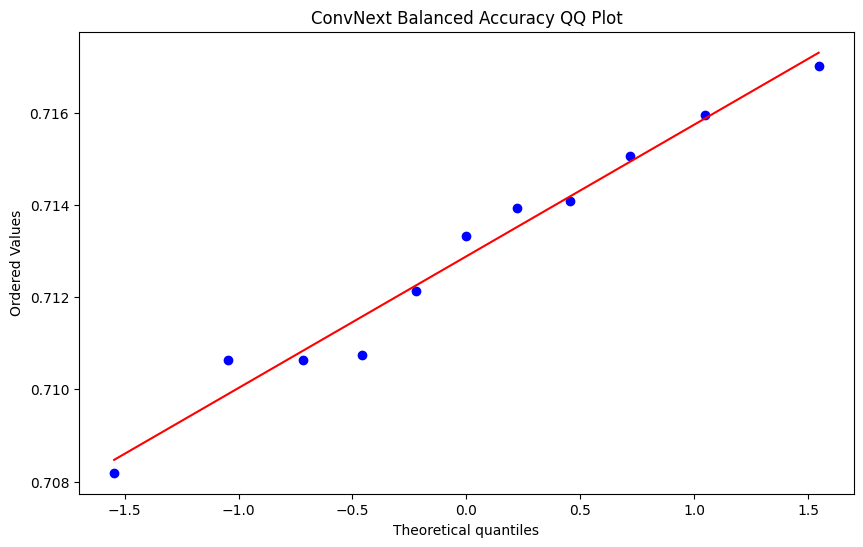

In [81]:
import scipy.stats as stats
# make a qq plot plotting each separate model
plt.figure(figsize=(10, 6))
stats.probplot(vit_ensemble["test/BalancedAccuracy"], dist="norm", plot=plt)
plt.title("VIT Ensemble Balanced Accuracy QQ Plot")

plt.figure(figsize=(10, 6))
stats.probplot(conv_ensemble["test/BalancedAccuracy"], dist="norm", plot=plt)
plt.title("Conv Ensemble Balanced Accuracy QQ Plot")

plt.figure(figsize=(10, 6))
stats.probplot(vit_base_16["test/BalancedAccuracy"], dist="norm", plot=plt)
plt.title("VIT Base 16 Balanced Accuracy QQ Plot")

plt.figure(figsize=(10, 6))
stats.probplot(convnext["test/BalancedAccuracy"], dist="norm", plot=plt)
plt.title("ConvNext Balanced Accuracy QQ Plot")


In [82]:
# check that the data is normally distributed
# Perform the Shapiro-Wilk test for normality
can_make_anova = True
shapiro_stat, shapiro_p = stats.shapiro(vit_base_16["test/BalancedAccuracy"])
print(shapiro_stat, shapiro_p)
if shapiro_p < 0.05:
    print("The data vit base 16 is not normally distributed")
    can_make_anova = False
else:
    print("The data vit base 16 is normally distributed")

shapiro_stat, shapiro_p = stats.shapiro(convnext["test/BalancedAccuracy"])
print(shapiro_stat, shapiro_p)
if shapiro_p < 0.05:
    print("The data convnext is not normally distributed")
    can_make_anova = False
else:
    print("The data convnext is normally distributed")

shapiro_stat, shapiro_p = stats.shapiro(vit_ensemble["test/BalancedAccuracy"])
print(shapiro_stat, shapiro_p)
if shapiro_p < 0.05:
    print("The data vit ensemble is not normally distributed")
    can_make_anova = False
else:
    print("The data vit ensemble is normally distributed")

shapiro_stat, shapiro_p = stats.shapiro(conv_ensemble["test/BalancedAccuracy"])
print(shapiro_stat, shapiro_p)
if shapiro_p < 0.05:
    print("The data conv ensemble is not normally distributed")
    can_make_anova = False
else:
    print("The data conv ensemble is normally distributed")


0.8145937445069928 0.014640769765618372
The data vit base 16 is not normally distributed
0.9694417945449781 0.8808380883181934
The data convnext is normally distributed
0.9568463261258782 0.73182966333549
The data vit ensemble is normally distributed
0.8989075509043455 0.17925040349026589
The data conv ensemble is normally distributed


In [83]:
# Perform the Levene test for equal variances
levene_stat, levene_p = stats.levene(
    vit_ensemble["test/BalancedAccuracy"],
    conv_ensemble["test/BalancedAccuracy"],
    vit_base_16["test/BalancedAccuracy"],
    convnext["test/BalancedAccuracy"],
)
print(levene_stat, levene_p)
if levene_p < 0.05:
    print("The variances are not equal")
    can_make_anova = False
else:
    print("The variances are equal")

0.46085028291690244 0.7111790392376439
The variances are equal


In [84]:
# Perform the ANOVA
fvalue, pvalue = stats.f_oneway(
    vit_ensemble["test/BalancedAccuracy"],
    conv_ensemble["test/BalancedAccuracy"],
    vit_base_16["test/BalancedAccuracy"],
    convnext["test/BalancedAccuracy"],
)
# Print the results of the ANOVA with explanation of the results, null hypothesis is that the means of the balanced accuracy are equal for all models
print(fvalue, pvalue)
if pvalue < 0.05:
    print("Reject the null hypothesis, the means are not equal")
    print("There is a significant difference between the models in terms of balanced accuracy")
else:
    print("Fail to reject the null hypothesis, the means are equal")
    print("There is no significant difference between the models in terms of balanced accuracy")


2569.2224305749855 9.283037228219381e-46
Reject the null hypothesis, the means are not equal
There is a significant difference between the models in terms of balanced accuracy
